# Выбор локации для скважины

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Возможную прибыль и риски необходимо проанализировать техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Описание данных
Данные геологоразведки трёх регионов находятся в файлах:

/datasets/geo_data_0.csv. Скачать датасет

/datasets/geo_data_1.csv. Скачать датасет

/datasets/geo_data_2.csv. Скачать датасет

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

Загрузим необходимые библиотеки.

In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

import numpy as np

from scipy import stats as st 

## Загрузка и подготовка данных

Загрузим данные.

In [2]:
data_zero = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Выбор локации для скважины (8)/geo_data_0.csv')
data_one = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Выбор локации для скважины (8)/geo_data_1.csv')
data_two = pd.read_csv('/Users/alexander/Documents/Python/DataSets/Выбор локации для скважины (8)/geo_data_2.csv')

Изучим загруженные данные.

In [3]:
data_zero.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_one.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
data_two.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
data_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


3 набора данных имеют равную величину и не имеют пропусков.

Проверим на дубликаты.

In [9]:
print('Количество дубликатов в Таблице 0:', data_zero.duplicated().sum())
print('Количество дубликатов в Таблице 1:', data_one.duplicated().sum())
print('Количество дубликатов в Таблице 2:', data_two.duplicated().sum())

Количество дубликатов в Таблице 0: 0
Количество дубликатов в Таблице 1: 0
Количество дубликатов в Таблице 2: 0


Дубликатов нет.

## Изучим данные

In [10]:
data_zero.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [11]:
data_one.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
data_two.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


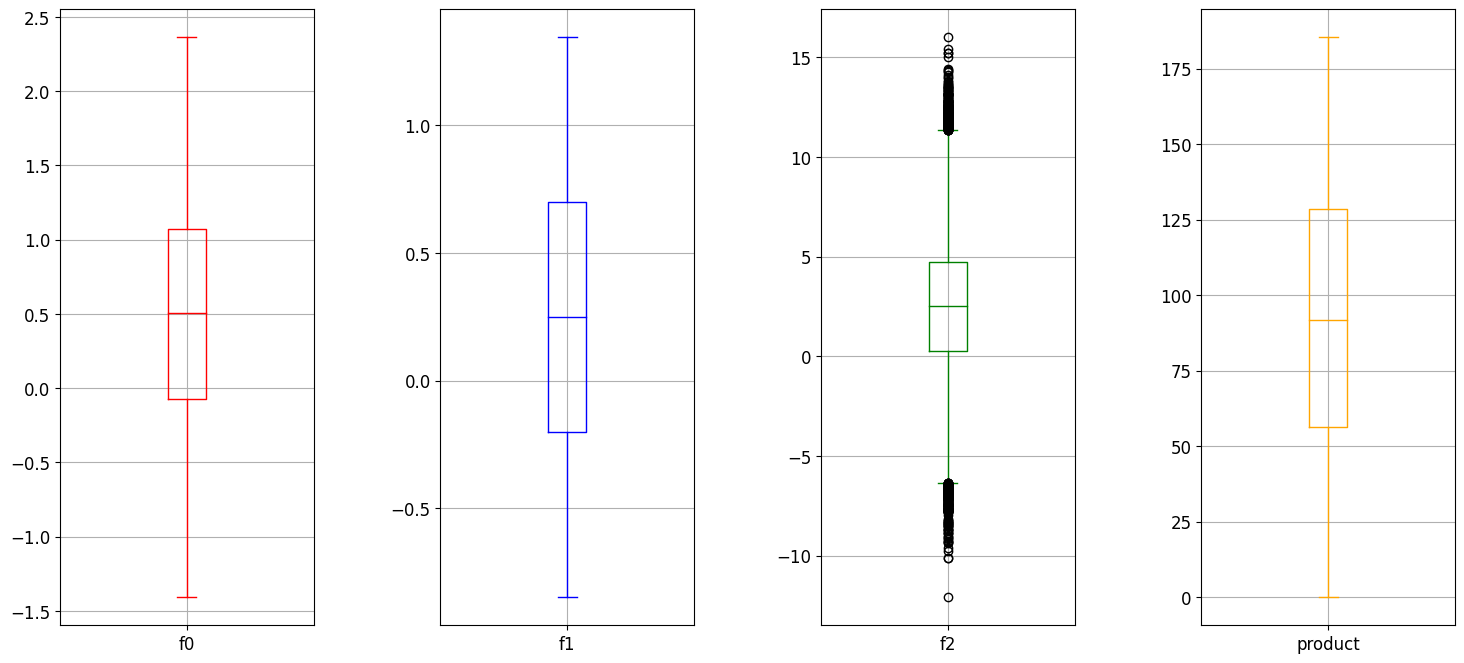

In [13]:
# 4 subplots in one row
fig, ax = plt.subplots(1, 4, figsize=(18, 8))

# draw boxplots - for one column in each subplot
data_zero.boxplot('f0', ax=ax[0], color = 'red', fontsize = 12)
data_zero.boxplot('f1', ax=ax[1], color = 'blue', fontsize = 12)
data_zero.boxplot('f2', ax=ax[2], color = 'green', fontsize = 12)
data_zero.boxplot('product', ax=ax[3], color = 'orange', fontsize = 12)

plt.subplots_adjust(wspace=0.5) 

plt.show()

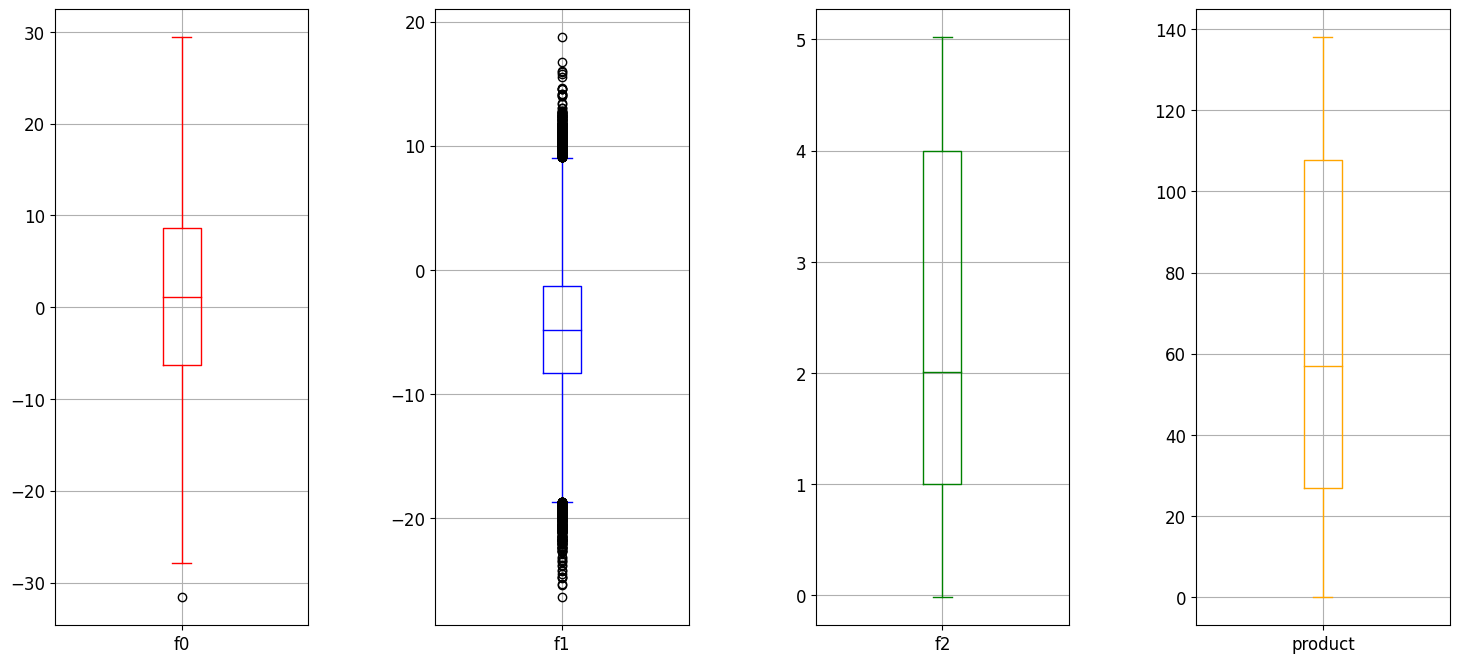

In [14]:
# 4 subplots in one row
fig, ax = plt.subplots(1, 4, figsize=(18, 8))

# draw boxplots - for one column in each subplot
data_one.boxplot('f0', ax=ax[0], color = 'red', fontsize = 12)
data_one.boxplot('f1', ax=ax[1], color = 'blue', fontsize = 12)
data_one.boxplot('f2', ax=ax[2], color = 'green', fontsize = 12)
data_one.boxplot('product', ax=ax[3], color = 'orange', fontsize = 12)

plt.subplots_adjust(wspace=0.5) 

plt.show()

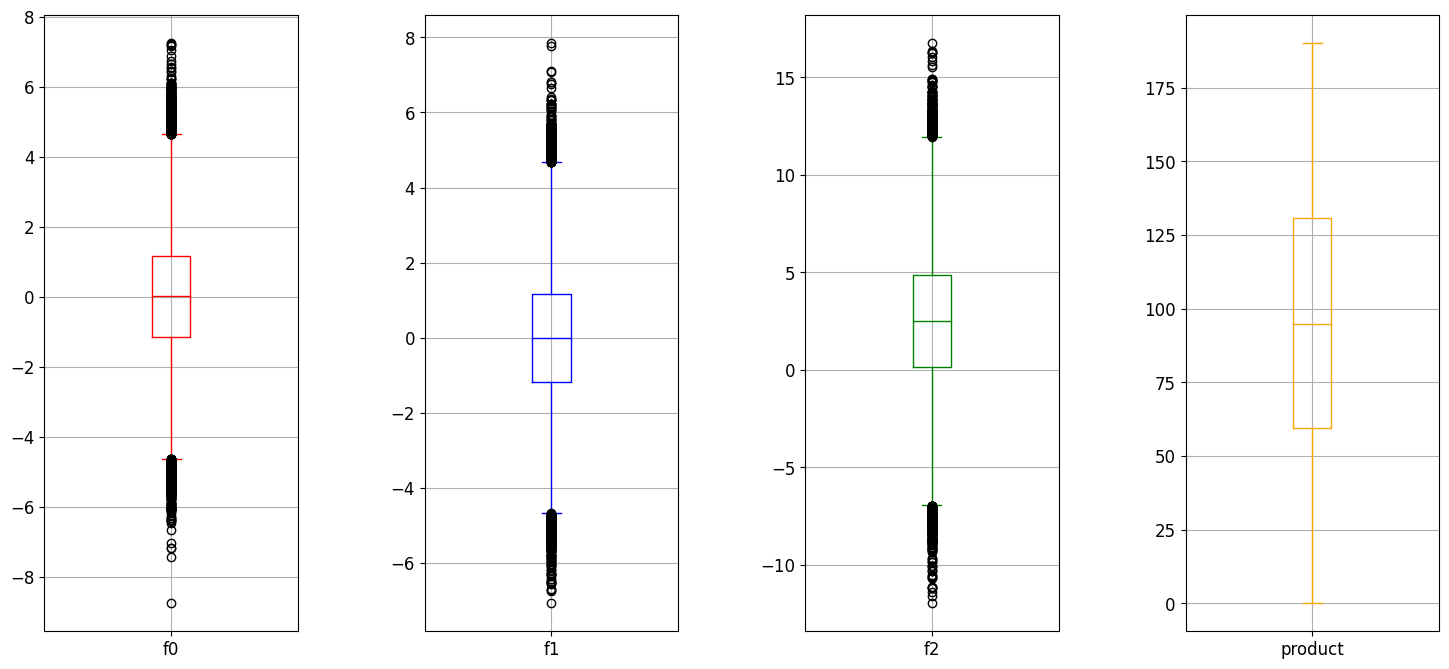

In [15]:
# 4 subplots in one row
fig, ax = plt.subplots(1, 4, figsize=(18, 8))

# draw boxplots - for one column in each subplot
data_two.boxplot('f0', ax=ax[0], color = 'red', fontsize = 12)
data_two.boxplot('f1', ax=ax[1], color = 'blue', fontsize = 12)
data_two.boxplot('f2', ax=ax[2], color = 'green', fontsize = 12)
data_two.boxplot('product', ax=ax[3], color = 'orange', fontsize = 12)

plt.subplots_adjust(wspace=0.5) 

plt.show()

В стобцах:

1. data_zero.boxplot('f2')
2. data_one.boxplot('f1')
3. data_two.boxplot('f0')
4. data_two.boxplot('f1')
5. data_two.boxplot('f2')

Имеются выбросы, которые могут помешать обучению моделю, найдем их количество, чтобы понять от какого потенциально объма данных придется избваиться.

Изучим от какого объема данных потребуется избавится.

## Очистка данных от выбросов

In [16]:
def outlier_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1     
    botom_line = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    del_values = []
    for i in df[column]:
        if i <= botom_line or i >= upper_bound:
            del_values.append(i)
    #print(get_variable_name_value(df)[0])
    print('Количество строк к удалению:', len(del_values))        
    print('Доля строк к исходнуму dataset:', len(del_values)/len(df[column])*100,'%')    


In [17]:
outlier_filter(data_zero, 'f2')
outlier_filter(data_one,'f1')
outlier_filter(data_two, 'f0')
outlier_filter(data_two, 'f1')
outlier_filter(data_two, 'f2')

Количество строк к удалению: 506
Доля строк к исходнуму dataset: 0.506 %
Количество строк к удалению: 636
Доля строк к исходнуму dataset: 0.636 %
Количество строк к удалению: 733
Доля строк к исходнуму dataset: 0.733 %
Количество строк к удалению: 684
Доля строк к исходнуму dataset: 0.6839999999999999 %
Количество строк к удалению: 584
Доля строк к исходнуму dataset: 0.584 %


Конечно для data_two получается более 2000 строк (более 2%) к удалению, но возможно там есть и дубюликаты, проверим их позже.

Напишем формулу для поиска индексов строк которые требуется удалить.

In [18]:
def indexes_to_drop_outlier_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1     
    botom_line = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    indexes_to_drop = []
    for index, value in enumerate(df[column]):
        if value <= botom_line or value >= upper_bound:
            indexes_to_drop.append(index)
    
    return indexes_to_drop

Применим функцию.

In [19]:
indexes_to_drop_data_zero = indexes_to_drop_outlier_filter(data_zero, 'f2')

data_zero_drop_outlier = data_zero.drop(indexes_to_drop_data_zero)

print('Количество отсавшихся строк:', len(data_zero_drop_outlier))

Количество отсавшихся строк: 99494


In [20]:
indexes_to_drop_data_one = indexes_to_drop_outlier_filter(data_one, 'f1')

data_one_drop_outlier = data_one.drop(indexes_to_drop_data_one)

print('Количество отсавшихся строк:', len(data_one_drop_outlier))

Количество отсавшихся строк: 99364


In [21]:
#создадим листы со списком индексов по всей таблице
indexes_to_drop_data_two_f0 = indexes_to_drop_outlier_filter(data_two, 'f0')
indexes_to_drop_data_two_f1 = indexes_to_drop_outlier_filter(data_two, 'f1')
indexes_to_drop_data_two_f2 = indexes_to_drop_outlier_filter(data_two, 'f2')

#объеденим листы
indexes_to_drop_data_two = indexes_to_drop_data_two_f0 + indexes_to_drop_data_two_f1 + indexes_to_drop_data_two_f2

print('Количество строк к удалению до поиска дубликатов:', len(indexes_to_drop_data_two))
print()

#удалим дубликаты
indexes_to_drop_data_two = [*set(indexes_to_drop_data_two)] # такой способ удаления дибликатов в листе нашел

print('Количество строк к удалению после удаления дубликатов:', len(indexes_to_drop_data_two))
print()

#удалим выбивающиеся данные
data_two_drop_outlier = data_two.drop(indexes_to_drop_data_two)

print('Количество отсавшихся строк:', len(data_two_drop_outlier))

Количество строк к удалению до поиска дубликатов: 2001

Количество строк к удалению после удаления дубликатов: 1996

Количество отсавшихся строк: 98004


Поправим индексы обработанных данных.

In [22]:
data_zero_drop_outlier = data_zero_drop_outlier.reset_index(drop = True)
data_one_drop_outlier = data_one_drop_outlier.reset_index(drop = True)
data_two_drop_outlier = data_two_drop_outlier.reset_index(drop = True)

display(data_zero_drop_outlier.head())
display(data_one_drop_outlier.head())
display(data_two_drop_outlier.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


## Взаимосвязь данных

Проверим взаимосвязь данных.

In [23]:
display(data_zero.corr())
display(data_one.corr())
display(data_two.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Признак f2 в регионе 1 сильно коррелирует с целевым признаком (0.999397).

## Разбивка данных

Разбем данные на обучающую и валидационную выборки в соотношении 75:25.

In [24]:
features = data_zero.drop(['id', 'product'], axis=1)
target = data_zero['product']

features_train_data_zero, features_valid_data_zero, target_train_data_zero, target_valid_data_zero = train_test_split(
    features, target, test_size=0.25, random_state=12345)

print(features_train_data_zero.shape)
print(features_valid_data_zero.shape)
print(target_train_data_zero.shape) 
print(target_valid_data_zero.shape) 

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [25]:
#features = data_one_drop_outlier_drop_f2.drop(['id', 'product'], axis=1)
#target = data_one_drop_outlier_drop_f2['product']

features = data_one.drop(['id', 'product'], axis=1)
target = data_one['product']

features_train_data_one, features_valid_data_one, target_train_data_one, target_valid_data_one = train_test_split(
    features, target, test_size=0.25, random_state=12345)

print(features_train_data_one.shape)
print(features_valid_data_one.shape)
print(target_train_data_one.shape)
print(target_valid_data_one.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [26]:
features = data_two.drop(['id', 'product'], axis=1)
target = data_two['product']

features_train_data_two, features_valid_data_two, target_train_data_two, target_valid_data_two = train_test_split(
    features, target, test_size=0.25, random_state=12345)

print(features_train_data_two.shape)
print(features_valid_data_two.shape)
print(target_train_data_two.shape)
print(target_valid_data_two.shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [27]:
features_train_data_zero.head()

,f0,f1,f2
27212,0.022450,0.951034,2.197333
7866,1.766731,0.007835,6.436602
62041,0.724514,0.666063,1.840177
70185,-1.104181,0.255268,2.026156
82230,-0.635263,0.747990,6.643327


## Маштабирование признаков

Приведем все признаки к единому масштабу, для этого предварительно напишем функцию.

In [28]:
def st_scaler(data_train, data_valid):   
    
    numeric = data_train.columns.tolist()
    

    scaler = StandardScaler()
    scaler.fit(data_train[numeric])
    data_train[numeric] = scaler.transform(data_train[numeric])
    data_valid[numeric] = scaler.transform(data_valid[numeric])
    
    return data_train, data_valid


Применим функцию.

In [29]:
print(features_train_data_zero.head())


             f0        f1        f2
27212  0.022450  0.951034  2.197333
7866   1.766731  0.007835  6.436602
62041  0.724514  0.666063  1.840177
70185 -1.104181  0.255268  2.026156
82230 -0.635263  0.747990  6.643327


In [30]:
st_scaler(features_train_data_zero, features_valid_data_zero)

(             f0        f1        f2
 27212 -0.544828  1.390264 -0.094959
 7866   1.455912 -0.480422  1.209567
 62041  0.260460  0.825069 -0.204865
 70185 -1.837105  0.010321 -0.147634
 82230 -1.299243  0.987558  1.273181
 ...         ...       ...       ...
 4094   1.567114 -1.087243 -0.272211
 85412 -1.904207 -0.525360  1.327530
 2177   0.418949 -1.296788 -0.196407
 77285  0.400077 -1.466874 -0.445317
 86498  1.746246  0.027415  2.766848
 
 [75000 rows x 3 columns],
              f0        f1        f2
 71751  0.517917 -0.610097 -0.126226
 80493  0.568391 -0.086063 -0.814914
 2655   0.805688 -1.613289 -1.341342
 53233  0.222503 -1.355437 -0.597275
 91141 -0.087941  1.433113 -0.544588
 ...         ...       ...       ...
 12581  1.541222 -0.709525  0.024535
 18456 -0.522565  0.474447 -0.103985
 73035 -0.138850  1.595071 -0.903485
 63834  0.658267 -1.428224  0.621967
 43558  1.409556 -0.650407  0.769670
 
 [25000 rows x 3 columns])

In [31]:
print(features_train_data_zero.head())

             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181


Функция работае, применим ее к оставшимся данным.

In [32]:
st_scaler(features_train_data_one, features_valid_data_one)
st_scaler(features_train_data_two, features_valid_data_two)

(             f0        f1        f2
 27212 -0.526160  0.776329 -0.400793
 7866  -0.889625 -0.404070 -1.222936
 62041 -1.133984  0.208576  0.296765
 70185  1.227045  1.570166 -0.764556
 82230 -0.194289  0.878312  0.840821
 ...         ...       ...       ...
 4094  -1.815240  0.398261  1.821017
 85412 -0.274576 -1.265211  0.245519
 2177   0.368564  0.797225  0.665575
 77285 -2.440690  0.113784  0.440907
 86498 -1.732468  0.393573 -1.424465
 
 [75000 rows x 3 columns],
              f0        f1        f2
 71751 -0.836717 -2.227439 -0.078489
 80493 -0.821648  0.740237 -1.000811
 2655  -2.651336 -0.235721 -0.244546
 53233  1.077998  0.938090  0.511313
 91141 -1.173938  2.387270  1.034363
 ...         ...       ...       ...
 12581 -0.761845 -0.067861 -0.819227
 18456  0.006155  0.509468  0.030344
 73035  0.416444 -0.084595  0.218987
 63834 -0.136658 -0.101235 -0.870787
 43558 -1.359565 -0.598457  1.716644
 
 [25000 rows x 3 columns])

## Обучение и проверка модели

Теперь данные готовы для построения модели.

Построим подель регрессии.

In [33]:
model = LinearRegression()

In [34]:
model.fit(features_train_data_zero, target_train_data_zero)
predicted_valid_data_zero = model.predict(features_valid_data_zero)
rmse_data_zero = mean_squared_error(target_valid_data_zero, predicted_valid_data_zero)** 0.5
r2_data_zero = model.score(features_valid_data_zero, target_valid_data_zero)
mean_valid_data_zero = target_valid_data_zero.mean()
mean_predicted_data_zero = predicted_valid_data_zero.mean()

print("Linear Regression")
print("RMSE =", rmse_data_zero)
print("R2 =", r2_data_zero)
print("Средний реальный запас нефти =", mean_valid_data_zero)
print("Средний предсказанный запас нефти =", mean_predicted_data_zero)

Linear Regression
RMSE = 37.5794217150813
R2 = 0.27994321524487786
Средний реальный запас нефти = 92.07859674082927
Средний предсказанный запас нефти = 92.59256778438035


In [35]:
model.fit(features_train_data_one, target_train_data_one)
predicted_valid_data_one = model.predict(features_valid_data_one)
rmse_data_one = mean_squared_error(target_valid_data_one, predicted_valid_data_one)** 0.5
r2_data_one = model.score(features_valid_data_one, target_valid_data_one)
mean_valid_data_one = target_valid_data_one.mean()
mean_predicted_data_one = predicted_valid_data_one.mean()

print("Linear Regression")
print("RMSE =", rmse_data_one)
print("R2 =", r2_data_one)
print("Средний реальный запас нефти =", mean_valid_data_one)
print("Средний предсказанный запас нефти =", mean_predicted_data_one)

Linear Regression
RMSE = 0.8930992867756162
R2 = 0.9996233978805127
Средний реальный запас нефти = 68.72313602435997
Средний предсказанный запас нефти = 68.728546895446


R2 и RMSE почти равны 1, это из-за признака f2, который сильно коррелирует с целевым признаком.

In [36]:
model.fit(features_train_data_two, target_train_data_two)
predicted_valid_data_two = model.predict(features_valid_data_two)
rmse_data_two = mean_squared_error(target_valid_data_two, predicted_valid_data_two)** 0.5
r2_data_two = model.score(features_valid_data_two, target_valid_data_two)
mean_valid_data_two = target_valid_data_two.mean()
mean_predicted_data_two = predicted_valid_data_two.mean()

print("Linear Regression")
print("RMSE =", rmse_data_two)
print("R2 =", r2_data_two)
print("Средний реальный запас нефти =", mean_valid_data_two)
print("Средний предсказанный запас нефти =", mean_predicted_data_two)

Linear Regression
RMSE = 40.02970873393434
R2 = 0.20524758386040443
Средний реальный запас нефти = 94.88423280885438
Средний предсказанный запас нефти = 94.96504596800489


Соберем все данные в таблицу.

In [37]:
df = {'Регион': ['Регион 0', 'Регион 1', 'Регион 2'],
     'RMSE': [rmse_data_zero, rmse_data_one, rmse_data_two], 
     'R2': [r2_data_zero, r2_data_one, r2_data_two],
     'Средний реальный запас нефти' : [mean_valid_data_zero, mean_valid_data_one, mean_valid_data_two],
     'Средний предсказанный запас нефти' : [mean_predicted_data_zero, mean_predicted_data_one, mean_predicted_data_two]}
stat_df = pd.DataFrame(data=df)
stat_df.style.hide_index()

Регион,RMSE,R2,Средний реальный запас нефти,Средний предсказанный запас нефти
Регион 0,37.579422,0.279943,92.078597,92.592568
Регион 1,0.893099,0.999623,68.723136,68.728547
Регион 2,40.029709,0.205248,94.884233,94.965046


- Наилучшее качество модели линейной регрессии у 1ого региона, там высока кореляция с одним из признаков.
- Наивысшие показатели добыче по среднем реальным и предсказанным показателям в Регионе 2, Регион 1 на последнем месте.

## Подготовка к расчёту прибыли

Ранее по условиям задачи было переданы следующие данные.

Условия задачи:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Сосздадим список необходимых для работы констант.

In [38]:
EXAMINE_NUMBER_OF_WELL = 500
BEST_NUMBER_OF_WELL = 200

BUDGET_OF_REGION = 10000000000

PRICE_PER_BARREL = 450000

RISK_THRESHOLD = 0.025

Расчитаем требуемый объем добычи нефти с 1 скважины при условии ограничения в бюджете, кол-ве скважин и цене нефти за баррель

In [39]:
REQUIRED_AMMOUNT_OF_OIL_PER_WELL = BUDGET_OF_REGION / PRICE_PER_BARREL / BEST_NUMBER_OF_WELL

print('Требуемый объем добычи нефти с 1 скважины:', REQUIRED_AMMOUNT_OF_OIL_PER_WELL, 'тыс.барр.')

Требуемый объем добычи нефти с 1 скважины: 111.11111111111111 тыс.барр.


In [40]:
stat_df['Требуемый объем добычи нефти'] = REQUIRED_AMMOUNT_OF_OIL_PER_WELL
stat_df.style.hide_index()

Регион,RMSE,R2,Средний реальный запас нефти,Средний предсказанный запас нефти,Требуемый объем добычи нефти
Регион 0,37.579422,0.279943,92.078597,92.592568,111.111111
Регион 1,0.893099,0.999623,68.723136,68.728547,111.111111
Регион 2,40.029709,0.205248,94.884233,94.965046,111.111111


Средние показатели по добыче по всем регионам ниже среднего требуемого значения для выбранных 200 скважин, но показатели первого региона значительно ниже других.

## Расчёт прибыли и рисков 

Напишем функцию подсчета прибыли для лучших 200 скважин по кажому региону.

In [41]:
def income(target, prediction, price, wells_number, costs):
    
    target = target.reset_index(drop = True)
    
    wells_sorted = pd.Series(prediction).sort_values(ascending=False)[:wells_number]
    
    #wells_sorted = np.sort(prediction)[::-1]
    
    wells_production = target[wells_sorted.index]
    
    overall_production = wells_production.sum()
    
    return (price * overall_production - costs)/1000000

In [42]:
print("Прибыль с лучших 200 скважин в нулевом регионе:",
          income(target_valid_data_zero, predicted_valid_data_zero, 
          PRICE_PER_BARREL, BEST_NUMBER_OF_WELL, BUDGET_OF_REGION))
print('')
print("Прибыль с лучших 200 скважин в первом регионе:",
          income(target_valid_data_one, predicted_valid_data_one, 
          PRICE_PER_BARREL, BEST_NUMBER_OF_WELL, BUDGET_OF_REGION))
print('')
print("Прибыль с лучших 200 скважин в втором регионе:",
          income(target_valid_data_two, predicted_valid_data_two, 
          PRICE_PER_BARREL, BEST_NUMBER_OF_WELL, BUDGET_OF_REGION))

Прибыль с лучших 200 скважин в нулевом регионе: 3320.8260431398508

Прибыль с лучших 200 скважин в первом регионе: 2415.086696681511

Прибыль с лучших 200 скважин в втором регионе: 2710.3499635998323


В нулевом регионе прибыль с лучших 200 скважин наивысшая.

## Bootstrap

Проведем процедуру Bootstrap. Для начала напишем функцию.

In [43]:
def bootstrap(target, prediction):
    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target = target.reset_index(drop = True)
        #prediction = pd.Series(prediction)
        
        target_subsample = target.sample(n = EXAMINE_NUMBER_OF_WELL, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        income_well = income(target_subsample, probs_subsample, PRICE_PER_BARREL, BEST_NUMBER_OF_WELL, BUDGET_OF_REGION)
        values.append(income_well)
    
    values = pd.Series(values)
    return values

Применим функцию.

In [44]:
bootstrap_data_zero = bootstrap(target_valid_data_zero, predicted_valid_data_zero)
bootstrap_data_one = bootstrap(target_valid_data_one, predicted_valid_data_one)
bootstrap_data_two = bootstrap(target_valid_data_two, predicted_valid_data_two)

print(bootstrap_data_zero.shape)
print(bootstrap_data_one.shape)
print(bootstrap_data_two.shape)

(1000,)
(1000,)
(1000,)


Напишем функцию, которая:
- расчитывает среднюю добыбычу по региону
- найдем 95% доверительный интервал
- найдем вероятность того что будет убыток (прибыль равна нулю и меньше)


In [45]:
def stats(data):
    
    print("Средняя прибыль:", data.mean())

    print("95%-й Доверительный интервал:", data.quantile(0.025), '-', data.quantile(0.975))

    print("Риск убытков:", st.percentileofscore(data, 0), '%') # находим какой обхем данных в % лежит ниже 0
    

Применим функцию к данным собранныс помощью bootstrap.

In [46]:
print("Регион 0:")
stats(bootstrap_data_zero)

Регион 0:
Средняя прибыль: 396.1649848023711
95%-й Доверительный интервал: -111.21554589049526 - 909.7669415534225
Риск убытков: 6.9 %


In [47]:
print("Регион 1:")
stats(bootstrap_data_one)

Регион 1:
Средняя прибыль: 456.04510578666077
95%-й Доверительный интервал: 33.820509398983624 - 852.2894538660361
Риск убытков: 1.5 %


In [48]:
print("Регион 2:")
stats(bootstrap_data_two)

Регион 2:
Средняя прибыль: 404.40386656835676
95%-й Доверительный интервал: -163.3504133956011 - 950.3595749237995
Риск убытков: 7.6000000000000005 %


Соберем данные в единую таблицу для удобства анализа.

In [49]:
df = {'Регион': ['Регион 0', 'Регион 1', 'Регион 2'],
     'Средняя прибыль': [365, 443, 315], 
     '2.5% квантиль:': [-164, -4, -204],
     '97.5% квантиль:': [888, 889, 850],
     'Риск убытков:' : ['9.1%', '2.7%', '13.0%']}
stat_df = pd.DataFrame(data=df)
stat_df.style.hide_index()

Регион,Средняя прибыль,2.5% квантиль:,97.5% квантиль:,Риск убытков:
Регион 0,365,-164,888,9.1%
Регион 1,443,-4,889,2.7%
Регион 2,315,-204,850,13.0%


Вывод:
- С учетом полученных данных, наивысший риск убытка по 2ому региону, наименьший по 1ому. Максимальные значения по регионам плюс минус равны, а вот отрицательных значений по прибыли больше всего во 2ому региону. Средняя прибыль выше всего в 1ом регионе.
- Учитывая, что ML наилучшим образом описывает именно 1ый регион (в этом регионе признак f2 сильно коррелирует с целевым признаком).
- Учитывая вышеизложенное: наименьшие риски, вероятная прибыльность скважин и высокая уверенность в прогнозах по региону указывают на 1ый регион, хотя первично собранные данные о среднем объеме запасов и расчете прибыли с лучших 200 скважин, говорили, как раз в пользу других регионов.